In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install package for PEP8 verification
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8


Looking in indexes: https://test.pypi.org/simple/


In [3]:
# Install Beautifulsoup4
!pip install beautifulsoup4

In [4]:
# Install langdetect
!pip install langdetect

In [5]:

# Install package for PEP8 verification
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

Looking in indexes: https://test.pypi.org/simple/


In [6]:
pip install WordCloud

In [7]:
# Import Python libraries
import os
import time

%pylab 
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer

# Library for PEP8 standard
from nbpep8.nbpep8 import pep8

Using matplotlib backend: <object object at 0x0000022E65B36850>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")


C:\Users\Mohaw\AppData\Local\Temp\ipykernel_11156\1798984209.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [9]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Mohaw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Mohaw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Mohaw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Mohaw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Mohaw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [10]:
# Define path to data
path = 'C:\\Users\\Mohaw\\Downloads\\QueryResults(2011-2022)\\'

# Concat all CSV datasets in one Pandas DataFrame
df_columns = pd.read_csv(path+'QueryResults (2011).csv').columns
data = pd.DataFrame(columns=df_columns)
for f in os.listdir(path):
    if("cleaned" not in f):
        temp = pd.read_csv(path+f)
        data = pd.concat([data, temp], 
                         axis=0,
                         ignore_index=True)
data.head(20)


,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
0,4795928,2011-01-25 16:14:17,Check if element exists,<blockquote>\n <p><strong>Possible Duplicates...,<javascript><jquery>,46355,8,5,31
1,4796305,2011-01-25 16:44:40,Why does Internet Explorer not send HTTP post ...,<p>We are able to reliably recreate the follow...,<javascript><ajax><internet-explorer>,47941,12,6,115
2,4797373,2011-01-25 18:25:44,"Eval(), what's the point?",<p>The Official Documentation regarding <code>...,<php><eval>,955,6,6,6
3,4797418,2011-01-25 18:29:45,Tracking object allocation in python,<p>Is there any method I can override that wil...,<python><allocation><creation>,1474,7,3,10
4,4797444,2011-01-25 18:33:24,Weird error while installing Android app?,<p>In IntelliJ IDEA I exported signed applicat...,<android><intellij-idea><failed-installation>,8025,6,3,7
5,4797486,2011-01-25 18:39:00,Complexity of algorithms of different programm...,<p>I know that most programming languages are ...,<algorithm><language-agnostic><programming-lan...,1168,11,6,14
6,4797534,2011-01-25 18:45:15,How to manually send HTTP POST requests from F...,<p>I want to test some URLs in a web applicati...,<ajax><google-chrome><firefox><browser><http-p...,1876607,10,19,1434
7,5242433,2011-03-09 07:05:15,Create file name using date and time,"<p>I hope you could help me, I'm trying to cal...",<java><datetime><filenames>,100829,6,5,36
8,5242436,2011-03-09 07:06:09,C#: divide an int by 100,<p>How do I divide an <code>int</code> by 100?...,<c#><divide>,19991,6,5,9
9,5242533,2011-03-09 07:17:16,Fast way to find exponent of nearest superior ...,"<p>If I have a number <em>a</em>, I want the v...",<java><performance>,20669,7,9,26


In [11]:
data.tail(5)

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
104574,72833245,2022-07-01 18:19:12,Calling Firebase.initializeApp() returns 'Unab...,<p>I'm working with Firebase in flutter (lates...,<flutter><firebase>,14795,7,7,33
104575,72843016,2022-07-02 23:17:27,"""if"" statement syntax differences between C an...","<pre class=""lang-cpp prettyprint-override""><co...",<c++><c><language-lawyer><cross-language>,8166,9,4,93
104576,72856393,2022-07-04 12:01:50,How can I send URL parameter in ASP.NET Core W...,<p>I wrote this code in a C# ASP.NET Core Web ...,<c#><asp.net-core-webapi>,3433,14,3,6
104577,72859109,2022-07-04 15:31:57,Is enable_if the most concise way to define a ...,"<p>I'm referring to this:</p>\n<pre class=""lan...",<c++><templates><c++17><c++20><template-meta-p...,194,10,3,6
104578,72863168,2022-07-05 01:20:35,Hiding menu items in Fragment and showing them...,"<p>A month or so ago, the Android team depreca...",<android><android-fragments><android-menu>,3966,10,3,8


In [12]:
data.sample(5)

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
61437,30004004,2015-05-02 15:19:34,CodeIgniter update query gets executed twice,<p>I am using CodeIgniter 2.2.</p>\n\n<p>I hav...,<php><codeigniter-2>,3003,17,5,14
77669,37418028,2016-05-24 15:34:24,PostgreSQL - ERROR: column does not exist SQL ...,<p>I am trying to do a cohort analysis and com...,<sql><postgresql><column-alias>,50885,6,2,6
38976,18392729,2013-08-23 00:12:36,Writing a simple function using while,<p>A Python HOMEWORK Assignment asks me to wri...,<python>,1137,10,3,8
91586,52323684,2018-09-14 01:07:45,Usernotification framework badge does not incr...,<p>I am using <code>UserNotification</code> fr...,<ios><swift><usernotifications>,1821,11,2,8
63199,28311049,2015-02-03 23:53:19,Attempting to reference a deleted function whe...,<p>I'm getting a weird error working on a proj...,<c++><multithreading><c++11><struct>,19061,7,2,9


In [13]:
data.shape

(104579, 9)

In [14]:
data['CreationDate'].min()

'2011-01-01 07:13:08'

In [15]:
data['CreationDate'].max()

'2022-12-30 21:00:14'

In [16]:
# Print full dataset infos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104579 entries, 0 to 104578
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            104579 non-null  object
 1   CreationDate  104579 non-null  object
 2   Title         104579 non-null  object
 3   Body          104579 non-null  object
 4   Tags          104579 non-null  object
 5   ViewCount     104579 non-null  object
 6   CommentCount  104579 non-null  object
 7   AnswerCount   104579 non-null  object
 8   Score         104579 non-null  object
dtypes: object(9)
memory usage: 7.2+ MB


In [17]:
# Describe data
data.describe()


,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
count,104579,104579,104579,104579,104579,104579,104579,104579,104579
unique,104579,104552,104575,104579,76308,43832,55,82,970
top,4795928,2014-06-07 23:53:45,Can't connect to local MySQL server through so...,<blockquote>\n <p><strong>Possible Duplicates...,<javascript>,522,6,2,6
freq,1,2,2,1,674,26,29695,32714,14398


In [18]:
# La variable Id ne compte que des valeurs uniques, nous pouvons donc l'utiliser en index :
data.set_index('Id', inplace=True)

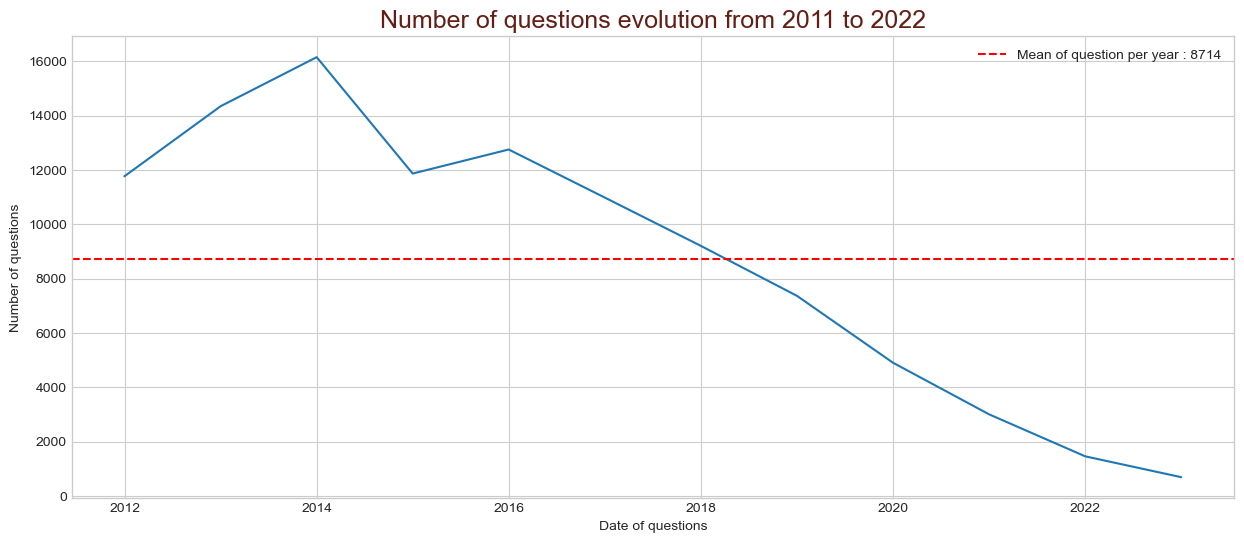

In [19]:
#regardons l'évolution du nombre de questions par année dans notre jeu de données.
# Convert CreationDate to datetime format
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

# Grouper with 1 year delta
post_year = data.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})

# Plot evolution
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=post_year, x=post_year.index, y='Title')
plt.axhline(post_year.Title.mean(), 
            color="r", linestyle='--',
            label="Mean of question per year : {:04d}"\
                   .format(int(post_year.Title.mean())))
plt.xlabel("Date of questions")
plt.ylabel("Number of questions")
plt.title("Number of questions evolution from 2011 to 2022",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()


# Exploration

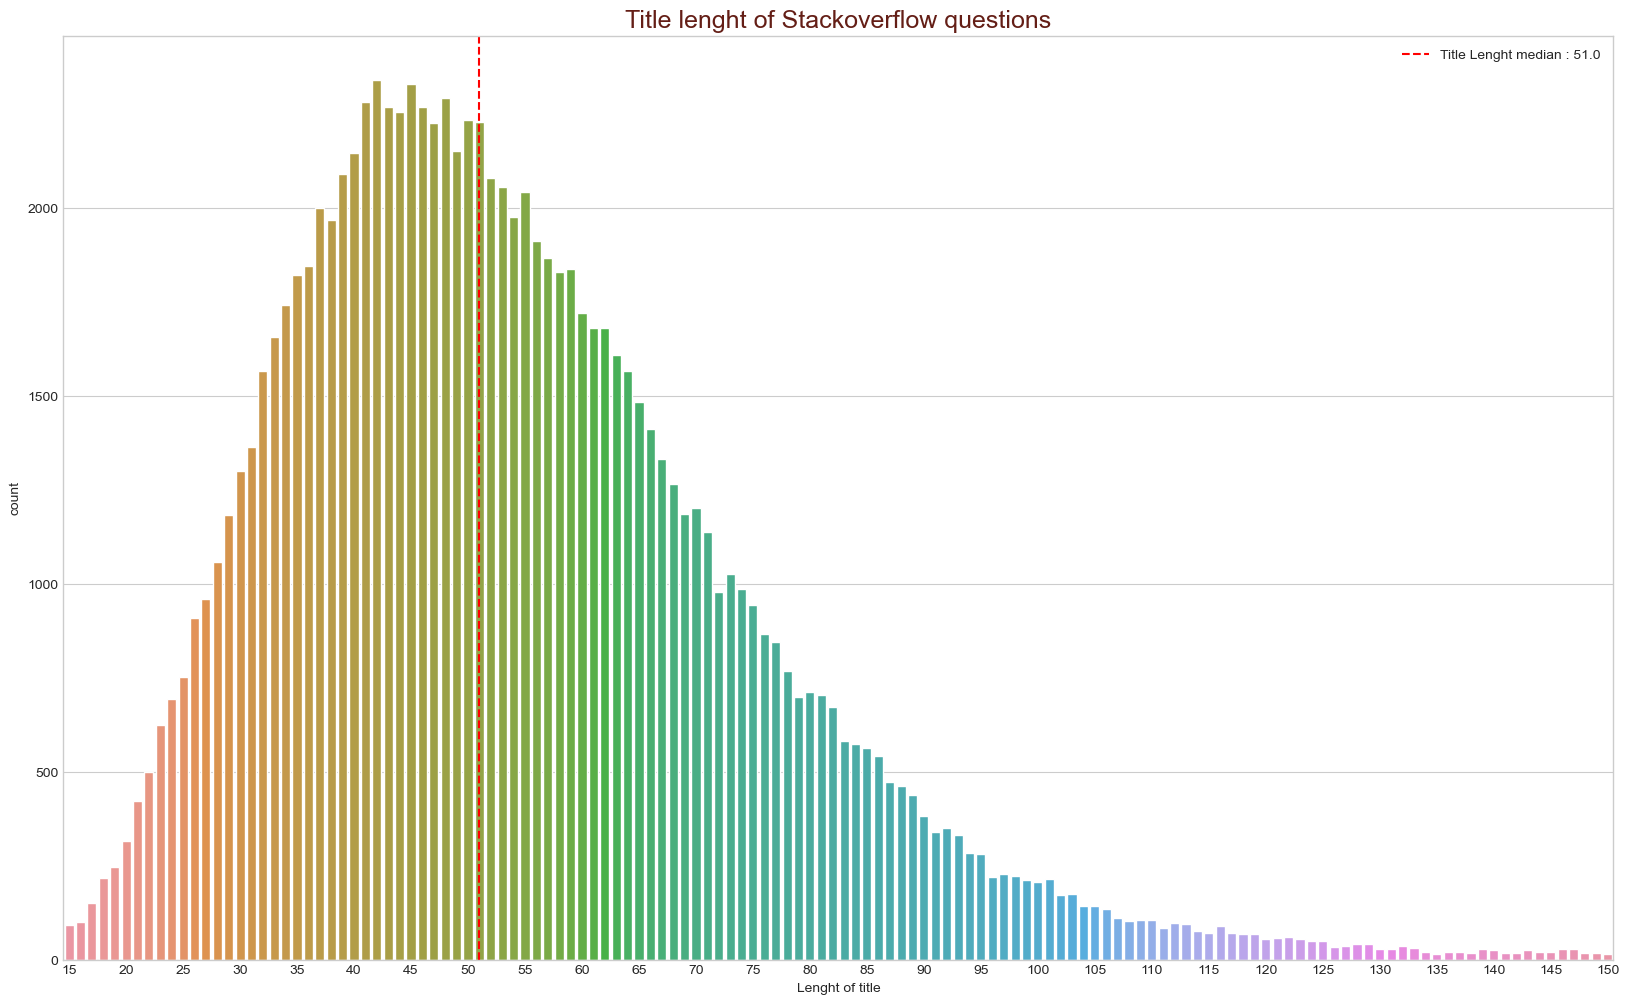

In [20]:
#vérifier la longeur des différents titres de la base 
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.Title.str.len())
start, end = ax.get_xlim()

ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(data.Title.str.len().median() - data.Title.str.len().min(),
            color="r", linestyle='--',
            label="Title Lenght median : "+str(data.Title.str.len().median()))
ax.set_xlabel("Lenght of title")
plt.title("Title lenght of Stackoverflow questions",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

C:\Users\Mohaw\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


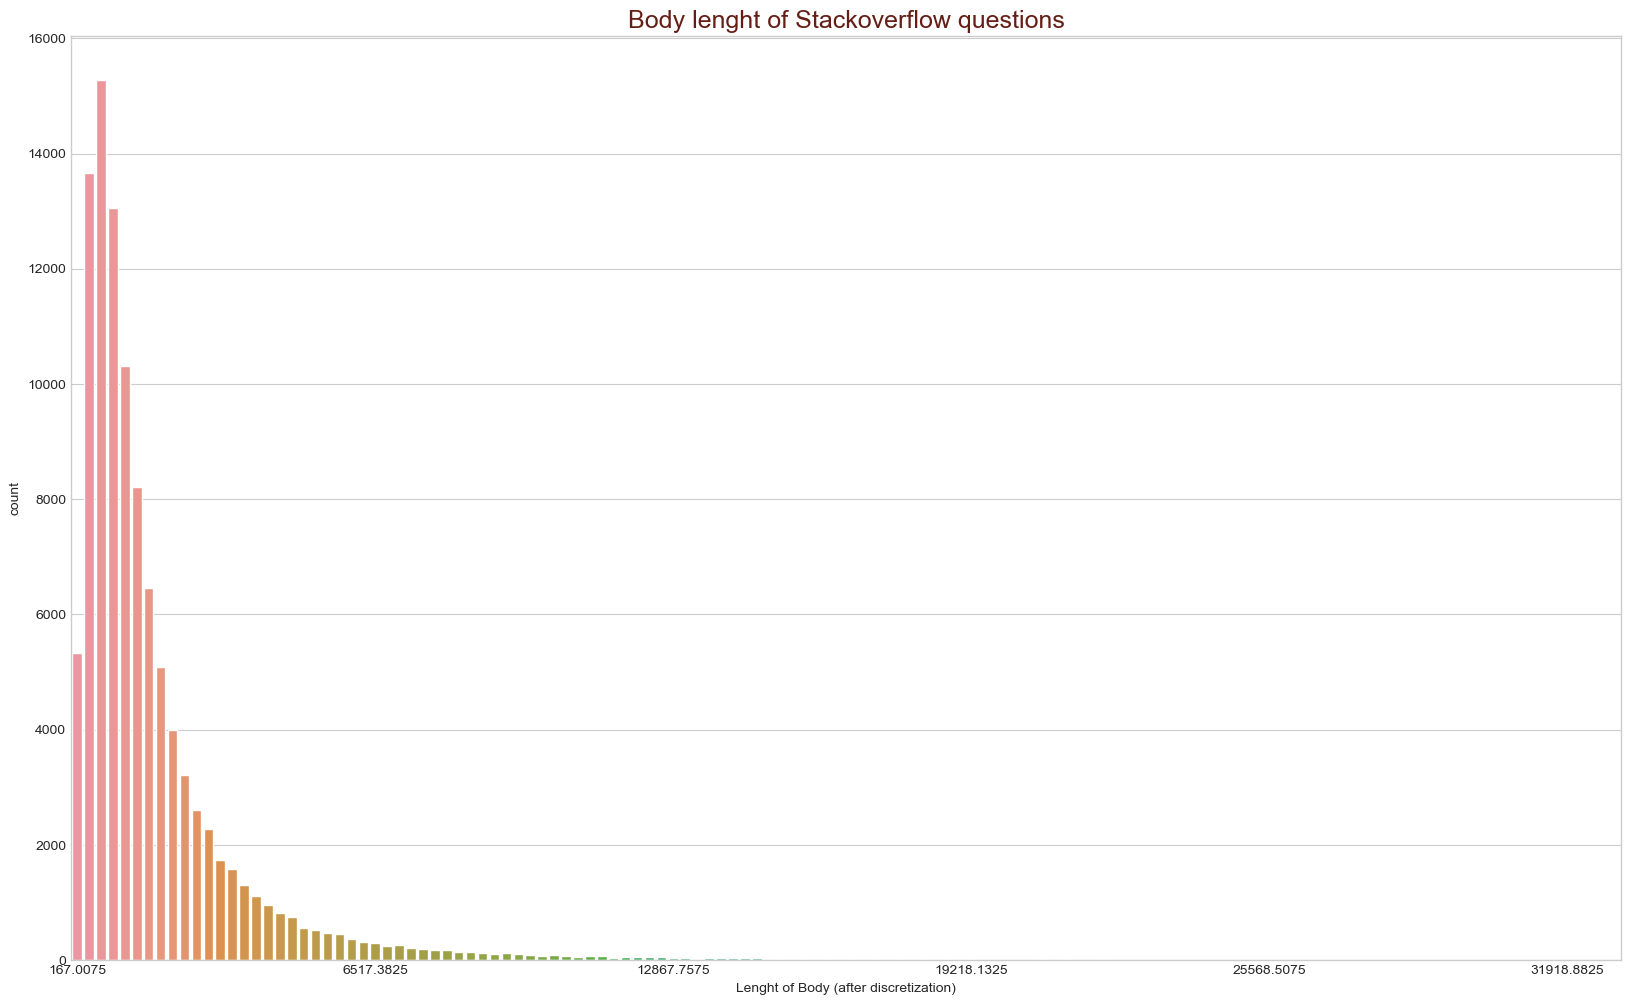

In [21]:
#ploter la répartition des longueurs de la variable Body (les corps de texte des questions). L'étendue étant très importante, nous allons dans un premier temps discrétiser ces longueur pour ne pas surcharger les temps de calculs de projection graphique :
# Discretizer for Body characters lenght
X = pd.DataFrame(data.Body.str.len())

# Sklearn discretizer with 200 bins
discretizer = KBinsDiscretizer(n_bins=200,
                               encode='ordinal',
                               strategy='uniform')
body_lenght = discretizer.fit_transform(X)
body_lenght = discretizer.inverse_transform(body_lenght)
body_lenght = pd.Series(body_lenght.reshape(-1))

fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=body_lenght)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Lenght of Body (after discretization)")
plt.title("Body lenght of Stackoverflow questions",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()


On remarque que la majeur partie des questions compte moins de 8000 caractères (balises HTML compris) mais certains posts dépassent les 12000 caractères. Nous allons filtrer notre jeu de données pour conserver uniquement les questions de moins de 8000 caractères afin de ne pas compliquer le NLP plus que nécessaire.

In [22]:
# Filter data on body lenght
data = data[data.Body.str.len() < 40000]
data.shape

(104577, 8)

# Analyse des tags
Nous allons faire l'analyse exploratoire sur les tags du jeu de données.

In [23]:
data['Tags'].head(5)

Id
4795928                             <javascript><jquery>
4796305            <javascript><ajax><internet-explorer>
4797373                                      <php><eval>
4797418                   <python><allocation><creation>
4797444    <android><intellij-idea><failed-installation>
Name: Tags, dtype: object

In [24]:
#Nous allons modifier les séparateurs de Tags pour favoriser les extractions :

# Replace open and close balise between tags
data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))

# Delete last "," for each row
data['Tags'] = data['Tags'].str[:-1]
data['Tags'].head(3)

Id
4795928                    javascript,jquery
4796305    javascript,ajax,internet-explorer
4797373                             php,eval
Name: Tags, dtype: object

In [25]:
#Les tags sont splités et ajoutés dans une liste pour les classer :

def count_split_tags(df, column, separator):
    """This function allows you to split the different words contained
    in a Pandas Series cell and to inject them separately into a list.
    This makes it possible, for example, to count the occurrences of words.

    Parameters
    ----------------------------------------
    df : Pandas Dataframe
        Dataframe to use.
    column : string
        Column of the dataframe to use
    separator : string
        Separator character for str.split.
    ----------------------------------------
    """
    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words

In [26]:
tags_list = count_split_tags(df=data, column='Tags', separator=',')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))


Le jeu de données compte 17444 tags.


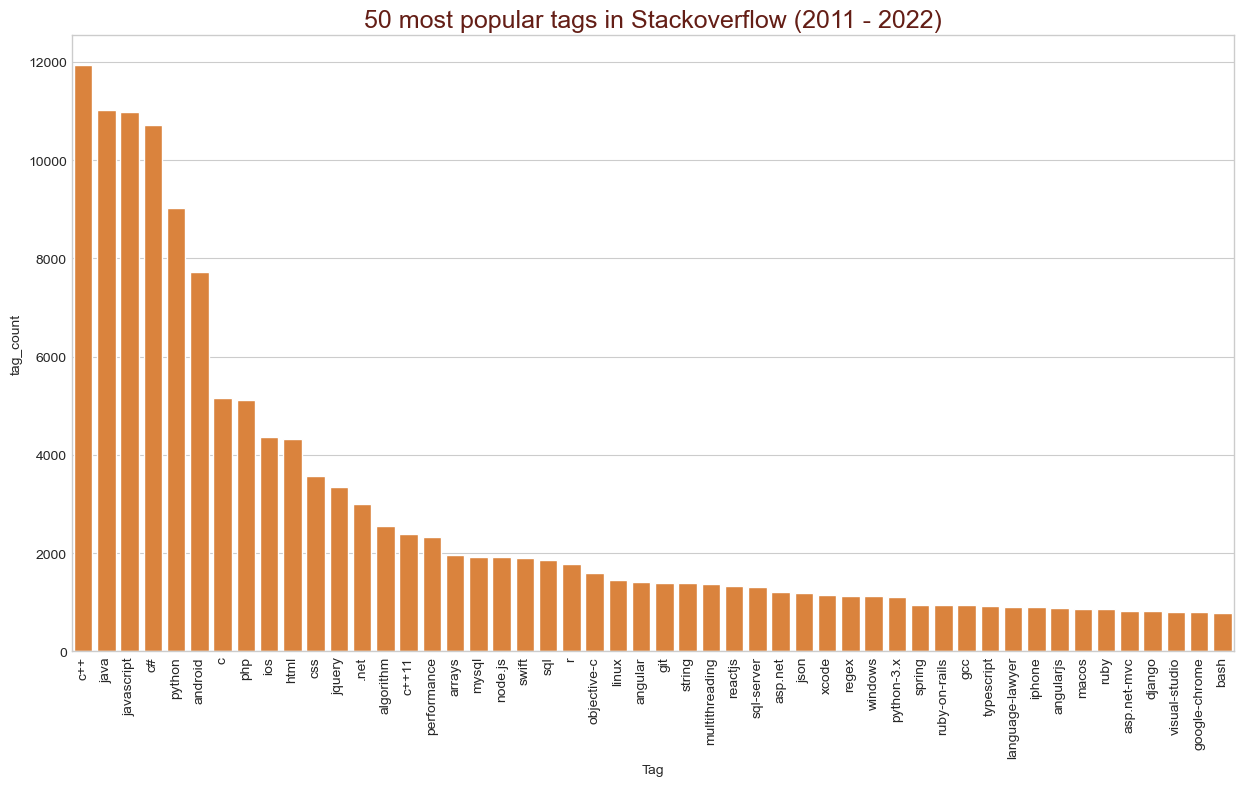

In [27]:
# Plot the results of splits
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:50, :],
            x=tags_list.iloc[0:50, :].index,
            y="tag_count", color="#f48023")
plt.xticks(rotation=90)
plt.title("50 most popular tags in Stackoverflow (2011 - 2022)",
          fontsize=18, color="#641E16")
plt.show()


Dans les 50 tags les plus populaires sur StackOverflow, les tags C++, java, C#, javascript et python sont dans le top 5. 

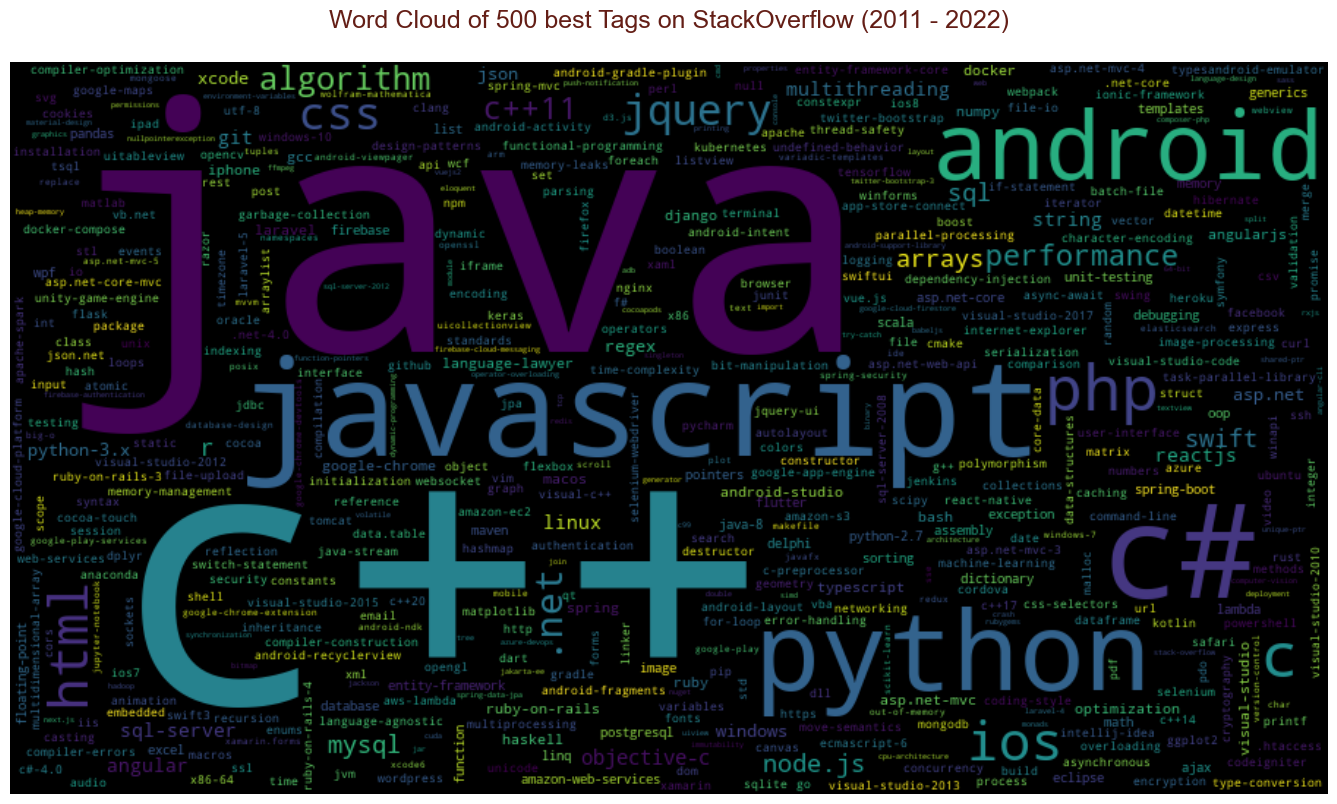

In [28]:
#visualisation des 500 premières catégories dans un nuage de mots :

# Plot word cloud with tags_list (frequencies)
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(tags_list.to_dict()['tag_count'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 500 best Tags on StackOverflow (2011 - 2022)\n",
          fontsize=18, color="#641E16")
plt.show()

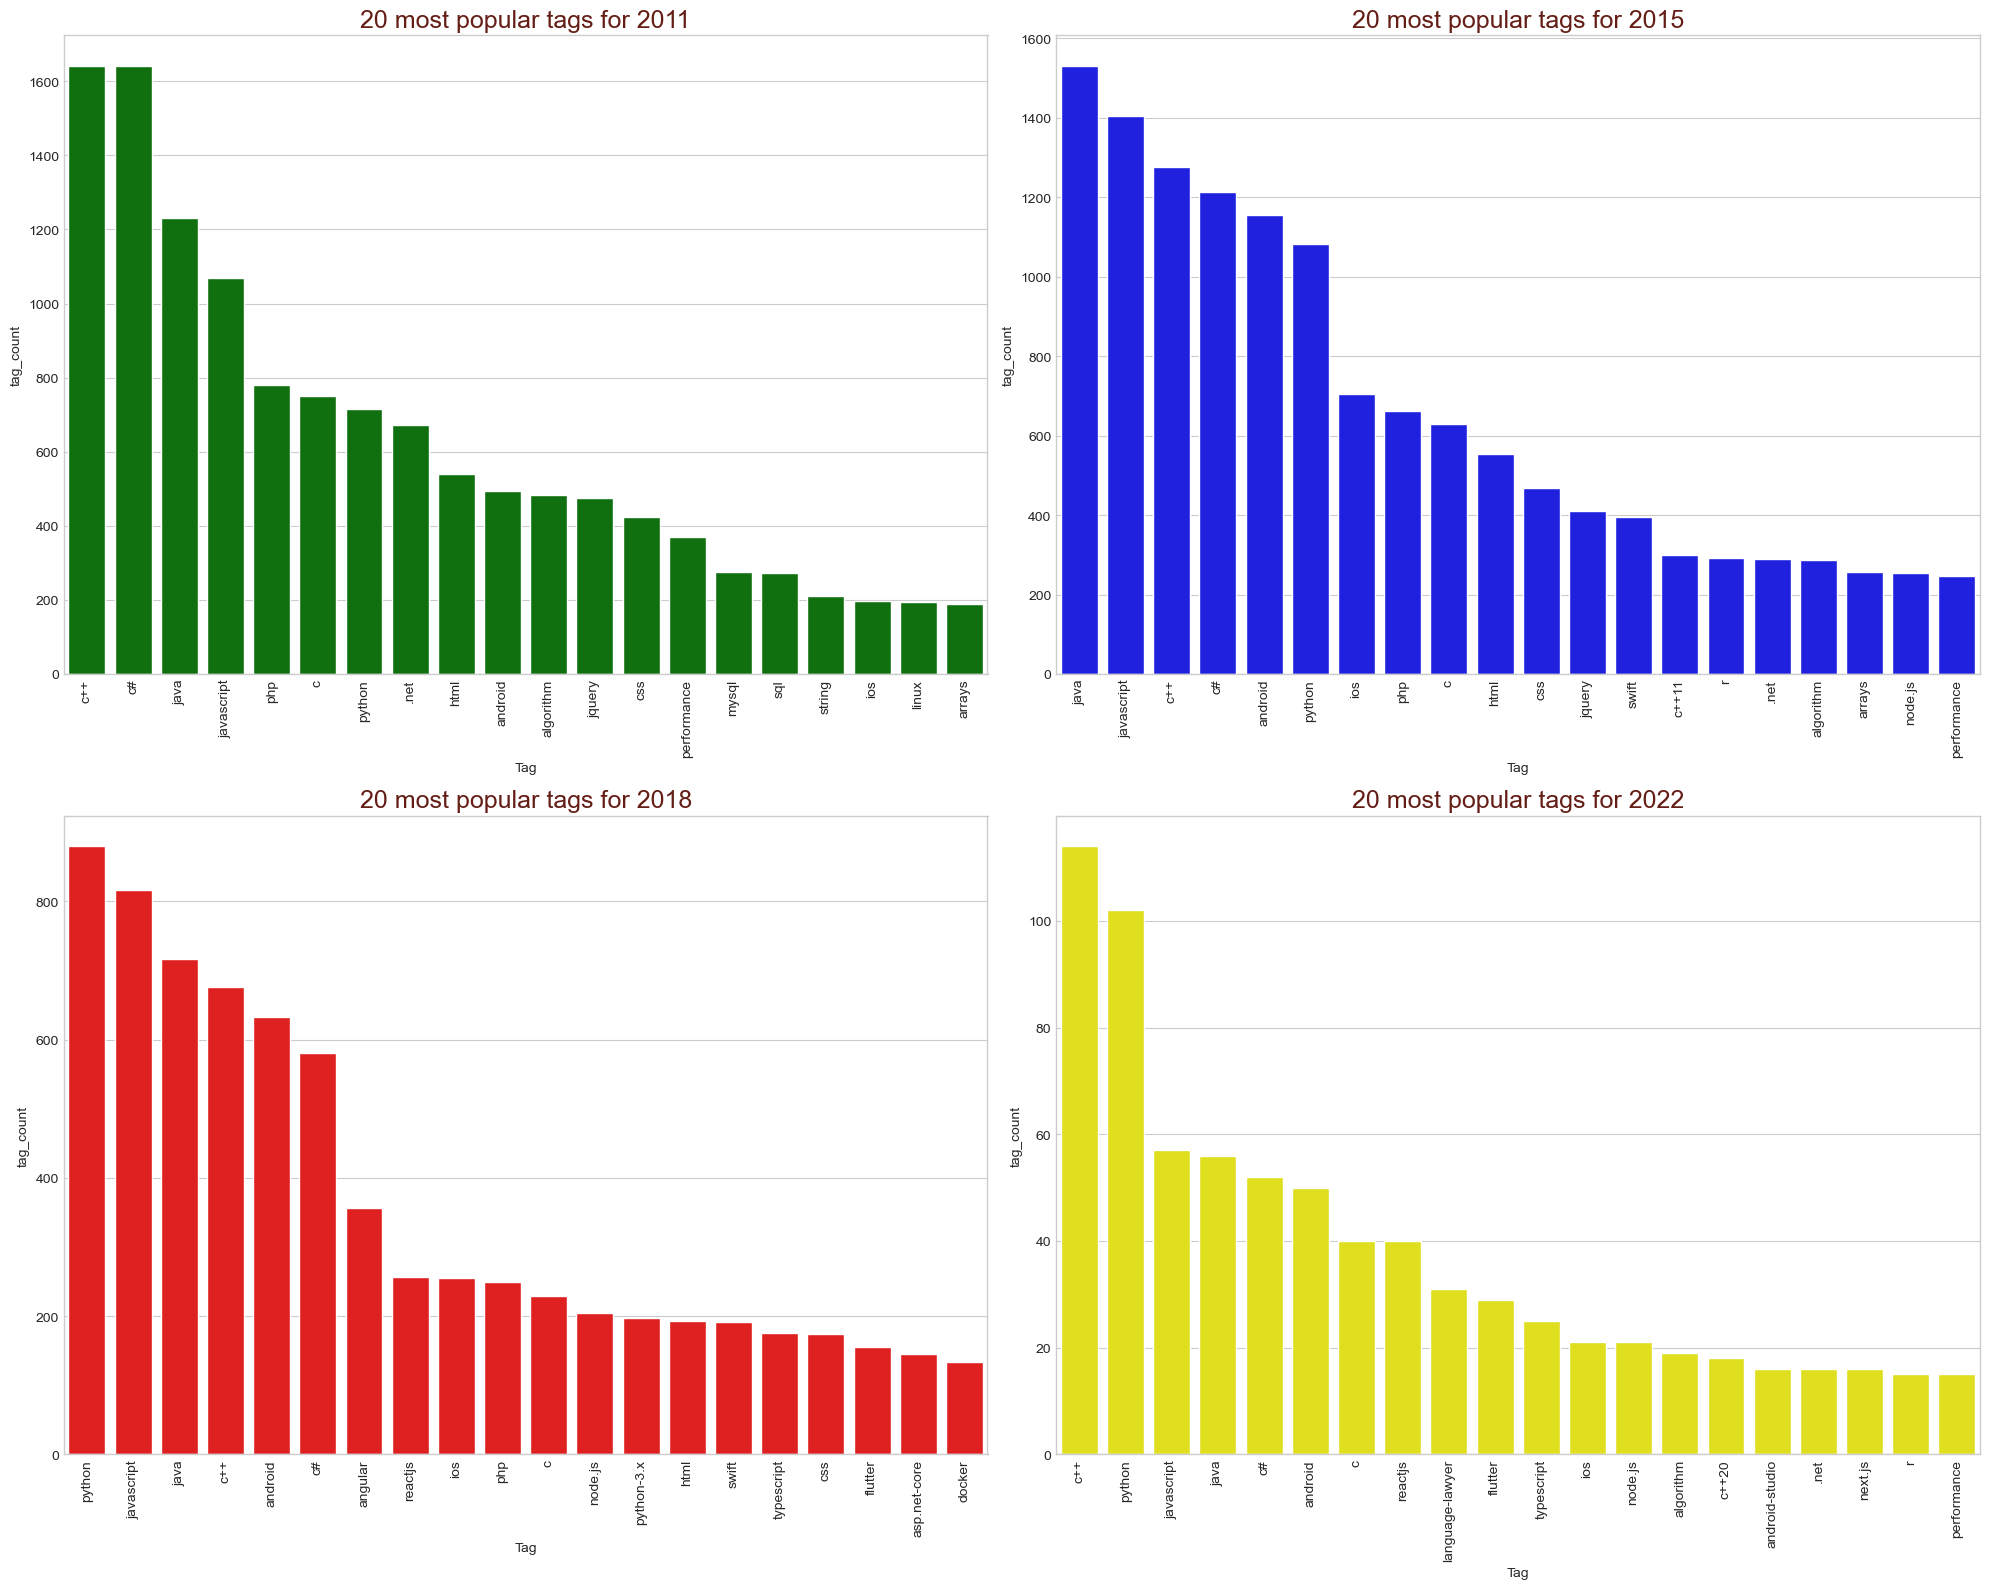

In [29]:
#regardons si ces tags populaires ont évolués au fil du temps. Prenons par exemple les années 2011, 2015, 2018 et 2022 pour vérifier.
# Subplots parameters
years = {0: 2011, 1: 2015, 2: 2018, 3: 2022}
colors = {0: "green", 1: "blue",
          2: "red", 3: "yellow"}
subplots = 4
cols = 2
rows = subplots // cols
rows += subplots % cols
position = range(1, subplots + 1)

# Plot popular tags for each year
fig = plt.figure(1, figsize=(20, 16))
for k in range(subplots):
    subset = data[data["CreationDate"].dt.year == years[k]]
    temp_list = count_split_tags(df=subset, column='Tags', separator=',')
    ax = fig.add_subplot(rows, cols, position[k])
    sns.barplot(data=temp_list.iloc[0:20, :],
            x=temp_list.iloc[0:20, :].index,
            y="tag_count", color=colors[k])
    plt.xticks(rotation=90)
    ax.set_title("20 most popular tags for {}".format(years[k]),
                 fontsize=18, color="#641E16")

fig.tight_layout()
plt.show()


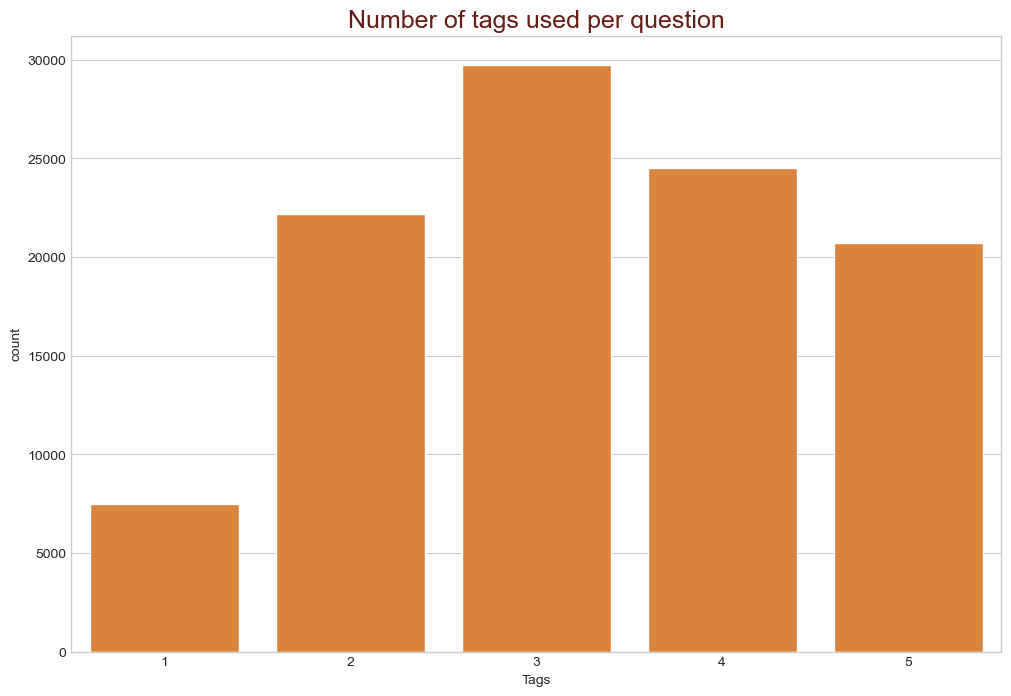

In [30]:
 #regardons le nombre de Tags par question :
    
    
    # Create a list of Tags and count the number
data['Tags_list'] = data['Tags'].str.split(',')
data['Tags_count'] = data['Tags_list'].apply(lambda x: len(x))

# Plot the result
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.Tags_count, color="#f48023")
ax.set_xlabel("Tags")
plt.title("Number of tags used per question",
          fontsize=18, color="#641E16")
plt.show()

Pour la majorité des questions StackOverflow analysées, 3 tags sont utilisés. Cela nous donne déjà une indication sur le type de modélisation à mettre en oeuvre.

Filtrage du jeu de données avec les meilleurs Tags :
Les process de NLP sont des algorithmes assez lents compte tenu de la quantité de données à traiter. Pour filtrer notre jeu de données, nous allons sélectionner toutes les questions qui comportent au minimum un des 50 meilleurs tags et supprimer les autres tags :



In [31]:
def filter_tag(x, top_list):
    """Comparison of the elements of 2 lists to 
    check if all the tags are found in a list of top tags.

    Parameters
    ----------------------------------------
    x : list
        List of tags to test.
    ----------------------------------------
    """
    temp_list = []
    for item in x:
        if (item in top_list):
            #x.remove(item)
            temp_list.append(item)
    return temp_list


In [32]:
top_tags = list(tags_list.iloc[0:50].index)
data['Tags_list'] = data['Tags_list']\
                    .apply(lambda x: filter_tag(x, top_tags))
data['number_of_tags'] = data['Tags_list'].apply(lambda x : len(x))
data = data[data.number_of_tags > 0]
print("New size of dataset : {} questions.".format(data.shape[0]))


New size of dataset : 92277 questions.


# Nettoyage des questions
Afin de traiter au mieux les données textuelles du Body, il est nécessaire de réaliser plusieurs tâches de data cleaning. Par exemple, le texte stocké dans cette variable est au format HTML. Ces balises vont polluer notre analyse. Nous allons donc supprimer toutes les balises HTML avec la librairie BeautifulSoup pour ne conserver que le texte brut.

Mais avant cette opération,nous allons supprimer tout le contenu placé entre 2 balises html <code></code>, cela nous permettra de supprimer tout le code brut souvent copié dans les questions Stackoverflow et qui pourrait avoir un fort impact pour la suite.



In [33]:
def remove_code(x):
    """Function based on the Beautifulsoup library intended to replace 
    the content of all the <code> </code> tags of a text specified as a parameter.

    Parameters
    ----------------------------------------
    x : string
        Sequence of characters to modify.
    ----------------------------------------
    """
    soup = BeautifulSoup(x,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)


In [34]:
start_time = time.time()
# Delete <code> in Body text
data['Body'] = data['Body'].apply(remove_code)
# Delete all html tags
data['Body'] = [BeautifulSoup(text,"lxml").get_text() for text in data['Body']]
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body'].head(5))


--------------------------------------------------
Execution time : 676.69s
--------------------------------------------------
Id
4795928    \nPossible Duplicates:\nIs there an “exists” f...
4796305    We are able to reliably recreate the following...
4797373    The Official Documentation regarding   as func...
4797418    Is there any method I can override that will a...
4797444    In IntelliJ IDEA I exported signed application...
Name: Body, dtype: object


In [36]:
#vérifier si les textes des questions sont rédigés en diverses langues. Cela nous permettra de définir la liste des stop words à éliminer :

# Create feature "lang" with langdetect library
def detect_lang(x):
    try:
          return detect(x)
    except:
        pass

start_time = time.time()
data['short_body'] = data['Body'].apply(lambda x: x[0:100])
data['lang'] = data.short_body.apply(detect_lang)
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)

--------------------------------------------------
Execution time : 1222.90s
--------------------------------------------------


In [37]:
# Contons language des titles
pd.DataFrame(data.lang.value_counts())

,count
lang,
en,92144
da,21
it,16
fr,15
af,13
no,9
ca,7
nl,7
tl,5


La langue Anglaise est très majoritairement représentée dans notre dataset. Nous allons donc supprimer de notre jeu de données tous les post dans une autre langue que l'anglais.

In [38]:
# Deletion of data that is not in the English language
data = data[data['lang']=='en']
data

,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score,Tags_list,Tags_count,number_of_tags,short_body,lang
Id,,,,,,,,,,,,,
4795928,2011-01-25 16:14:17,Check if element exists,\nPossible Duplicates:\nIs there an “exists” f...,"javascript,jquery",46355,8,5,31,"[javascript, jquery]",2,2,\nPossible Duplicates:\nIs there an “exists” f...,en
4796305,2011-01-25 16:44:40,Why does Internet Explorer not send HTTP post ...,We are able to reliably recreate the following...,"javascript,ajax,internet-explorer",47941,12,6,115,[javascript],3,1,We are able to reliably recreate the following...,en
4797373,2011-01-25 18:25:44,"Eval(), what's the point?",The Official Documentation regarding as func...,"php,eval",955,6,6,6,[php],2,1,The Official Documentation regarding as func...,en
4797418,2011-01-25 18:29:45,Tracking object allocation in python,Is there any method I can override that will a...,"python,allocation,creation",1474,7,3,10,[python],3,1,Is there any method I can override that will a...,en
4797444,2011-01-25 18:33:24,Weird error while installing Android app?,In IntelliJ IDEA I exported signed application...,"android,intellij-idea,failed-installation",8025,6,3,7,[android],3,1,In IntelliJ IDEA I exported signed application...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72831240,2022-07-01 15:06:31,Returning a pointer to a static buffer,"In C on a small embedded system, is there any ...","c,embedded,static-allocation",501,13,5,7,[c],3,1,"In C on a small embedded system, is there any ...",en
72843016,2022-07-02 23:17:27,"""if"" statement syntax differences between C an...",\nThis line of code is valid C++ code (it com...,"c++,c,language-lawyer,cross-language",8166,9,4,93,"[c++, c, language-lawyer]",4,3,\nThis line of code is valid C++ code (it com...,en
72856393,2022-07-04 12:01:50,How can I send URL parameter in ASP.NET Core W...,I wrote this code in a C# ASP.NET Core Web API...,"c#,asp.net-core-webapi",3433,14,3,6,[c#],2,1,I wrote this code in a C# ASP.NET Core Web API...,en


#identifions la nature de chaque mot du corpus afin de pouvoir ensuite conserver uniquement les noms. Nous allons ici créer une function qui sera appliquée ensuite dans un cleaner plus complet 

In [39]:
def remove_pos(nlp, x, pos_list):
    doc = nlp(x)
    list_text_row = []
    for token in doc:
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    join_text_row = " ".join(list_text_row)
    join_text_row = join_text_row.lower().replace("c #", "c#")
    return join_text_row


Nous allons à présent réaliser plusieurs opérations de Text cleaning pour que nos données soient exploitables par les algorithmes de NLP :

Suppression de tous les mots autres que les noms
Mettre tout le texte en minuscules
Supprimer les caractères Unicode (comme les Emojis par exemple)
Suppression des espaces supplémentaires
Suppression de la ponctuation
Suppression des liens
Supprimer les nombres


In [40]:
def text_cleaner(x, nlp, pos_list):
    """Function allowing to carry out the preprossessing on the textual data. 
        It allows you to remove extra spaces, unicode characters, 
        English contractions, links, punctuation and numbers.
        
        The re library for using regular expressions must be loaded beforehand.

    Parameters
    ----------------------------------------
    x : string
        Sequence of characters to modify.
    ----------------------------------------
    """
    # Remove POS not in "NOUN", "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not # (for C# for example)
    x = re.sub('[^\\w\\s#]', '', x)
    # Remove links
    x = re.sub(r'http*\S+', '', x)
    # Remove numbers
    x = re.sub(r'\w*\d+\w*', '', x)
    # Remove extra spaces
    x = re.sub('\s+', ' ', x)
    
    # Return cleaned text
    return x


In [41]:
import spacy.cli
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [42]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Delete STOP WORDS
def del_stop_words(text):
    document = nlp(text)
    


In [43]:
def clean_text(text):
    #Make text lowercase
    text = text.lower()
    # Remove English contractions
    text = re.sub("\'\w+", ' ', text)
    #
    text = text.encode("ascii", "ignore").decode()
    # Remove ponctuation (except # and ++ for c# and c++)
    text = re.sub('[^\\w\\s#\\s++]', ' ', text)
    # Remove numbers
    text = re.sub(r'\w*\d+\w*', ' ', text)
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    return text

# Applying the cleaning function 
data['Body'] = data['Body'].apply(lambda text: clean_text(text))

In [44]:


exec_time = time.time() - start_time
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body'].head(5))


Execution time : 3683.00s
--------------------------------------------------
Id
4795928     possible duplicates is there an exists functi...
4796305    we are able to reliably recreate the following...
4797373    the official documentation regarding as functi...
4797418    is there any method i can override that will a...
4797444    in intellij idea i exported signed application...
Name: Body, dtype: object


#Supprimons tous les stop words en langue Anglaise grâce à la librairie NLTK. Avant cette étape, nous allons réaliser une tockenisation c'est à dire découper les phrase en mots et création d'une liste.

In [45]:
start_time = time.time()
# Tockenization
data['Body'] = data.Body.apply(nltk.tokenize.word_tokenize)

# List of stop words in "EN" from NLTK
stop_words = stopwords.words("english")

# Remove stop words
data['Body'] = data.Body\
    .apply(lambda x : [word for word in x
                       if word not in stop_words
                       and len(word)>2])
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body'].head(3))

--------------------------------------------------
Execution time : 301.29s
--------------------------------------------------
Id
4795928    [possible, duplicates, exists, function, jquer...
4796305    [able, reliably, recreate, following, scenario...
4797373    [official, documentation, regarding, function,...
Name: Body, dtype: object


In [46]:
# Apply le Lemmatisation. Ce procédé consiste à prend le mot à sa forme racine appelée Lemme. Cela nous permet d'amener les
##mots à leur forme "dictionnaire". Nous allons pour cela utiliser à nouveau la librairie NLTK.

# Apply lemmatizer on Body
start_time = time.time()
wn = WordNetLemmatizer()
data['Body'] = data.Body\
    .apply(lambda x : [wn.lemmatize(word) for word in x])
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body'].head(3))

--------------------------------------------------
Execution time : 77.32s
--------------------------------------------------
Id
4795928    [possible, duplicate, exists, function, jquery...
4796305    [able, reliably, recreate, following, scenario...
4797373    [official, documentation, regarding, function,...
Name: Body, dtype: object


In [47]:
# body étant à présant cleané, nous allons regarder la répartition de la taille des corpus dans le jeu de donné nettoyé :

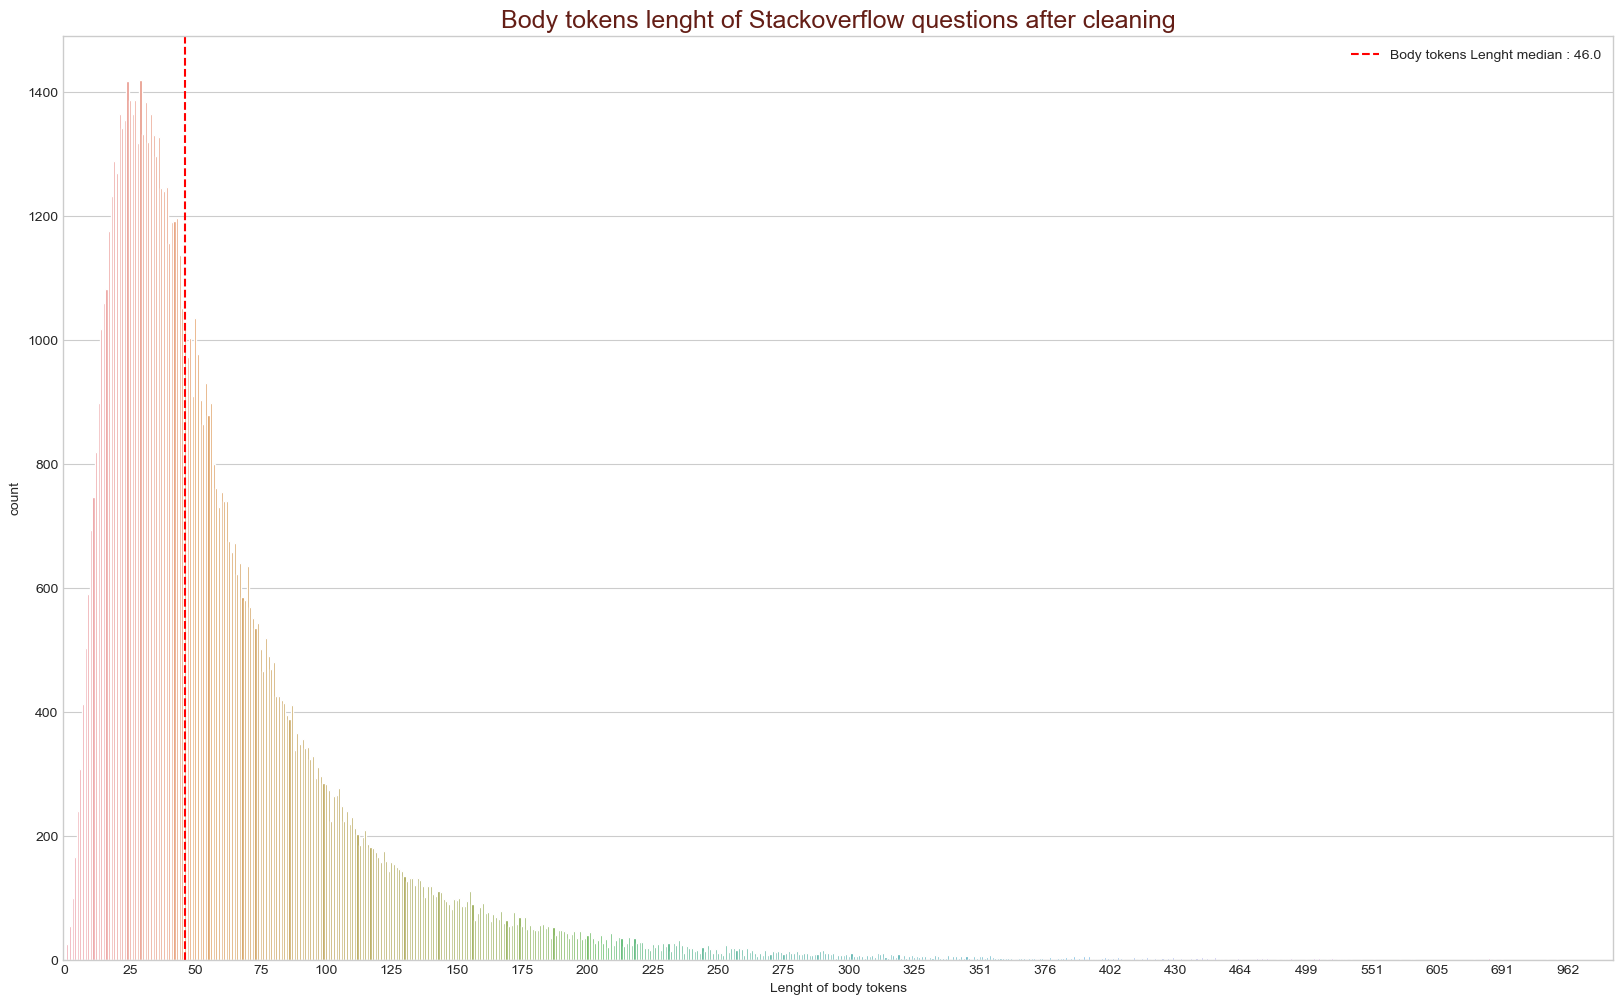

In [48]:
# Calculate lenght of each list in Body
data['body_tokens_count'] = [len(_) for _ in data.Body]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.body_tokens_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
plot_median = data.body_tokens_count.median()
plt.axvline(plot_median - data.body_tokens_count.min(),
            color="r", linestyle='--',
            label="Body tokens Lenght median : "+str(plot_median))
ax.set_xlabel("Lenght of body tokens")
plt.title("Body tokens lenght of Stackoverflow questions after cleaning",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()



In [49]:
#Regardons les fréquences de chaque mots de la variable Body pour visualiser les plus représentés :

# Create a list of all tokens for Body
full_corpus = []
for i in data['Body']:
    full_corpus.extend(i)

In [50]:
# Calculate distribition of words in Body token list
body_dist = nltk.FreqDist(full_corpus)
body_dist = pd.DataFrame(body_dist.most_common(8000),
                         columns=['Word', 'Frequency'])
body_dist.describe()


,Frequency
count,8000.000000
mean,683.005750
std,2453.558715
min,26.000000
25%,47.000000
50%,106.000000
75%,358.000000
max,60142.000000


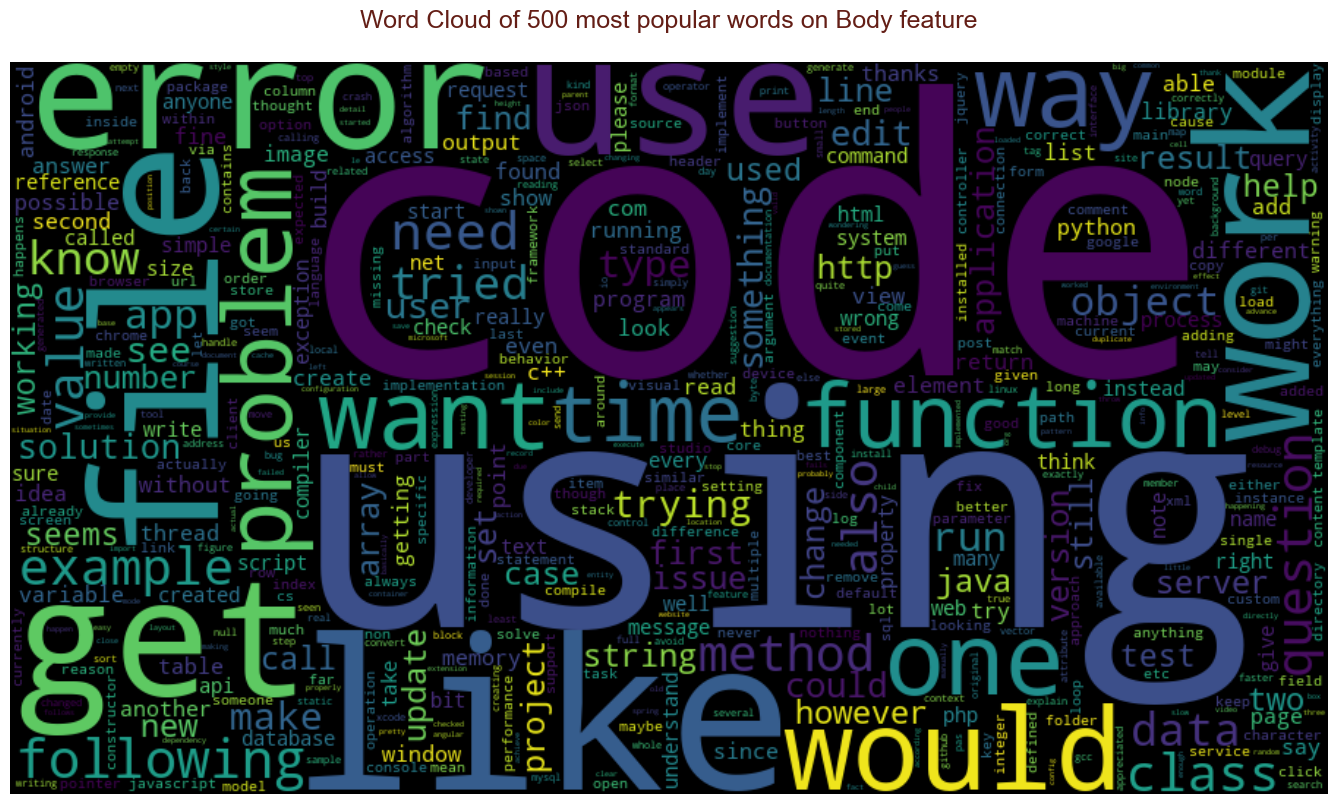

In [51]:
# Plot word cloud with tags_list (frequencies)
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(body_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 500 most popular words on Body feature\n",
          fontsize=18, color="#641E16")
plt.show()


# Nettoyage des titres

Nous avons préalablement défini une fonction pour notre cleaning des Body. Nous allons la modifier pour y intégrer la tokenisation, les stop words et la lemmanisation afin d'obtenir un processus complet à appliquer aux titres des posts.

In [52]:
def clean_text(text):
    #Make text lowercase
    text = text.lower()
    # Remove English contractions
    text = re.sub("\'\w+", ' ', text)
    #
    text = text.encode("ascii", "ignore").decode()
    # Remove ponctuation (except # and ++ for c# and c++)
    text = re.sub('[^\\w\\s#\\s++]', ' ', text)
    # Remove numbers
    text = re.sub(r'\w*\d+\w*', ' ', text)
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    return text

# Applying the cleaning function 
data['Title'] = data['Title'].apply(lambda text: clean_text(text))

In [53]:


exec_time = time.time() - start_time
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Title'].head(5))

Execution time : 161.75s
--------------------------------------------------
Id
4795928                              check if element exists
4796305    why does internet explorer not send http post ...
4797373                                 eval what the point 
4797418                 tracking object allocation in python
4797444            weird error while installing android app 
Name: Title, dtype: object


In [54]:
start_time = time.time()
# Tockenization
data['Title'] = data.Title.apply(nltk.tokenize.word_tokenize)

# List of stop words in "EN" from NLTK
stop_words = stopwords.words("english")

# Remove stop words
data['Title'] = data.Title\
    .apply(lambda x : [word for word in x
                       if word not in stop_words
                       and len(word)>2])
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Title'].head(3))

--------------------------------------------------
Execution time : 43.34s
--------------------------------------------------
Id
4795928                             [check, element, exists]
4796305    [internet, explorer, send, http, post, body, a...
4797373                                        [eval, point]
Name: Title, dtype: object


In [55]:
# Apply le Lemmatisation. Ce procédé consiste à prend le mot à sa forme racine appelée Lemme. Cela nous permet d'amener les mots à leur forme "dictionnaire". Nous allons pour cela utiliser à nouveau la librairie NLTK.

# Apply lemmatizer on Title
start_time = time.time()
wn = WordNetLemmatizer()
data['Title'] = data.Title\
    .apply(lambda x : [wn.lemmatize(word) for word in x])
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Title'].head(3))

--------------------------------------------------
Execution time : 6.41s
--------------------------------------------------
Id
4795928                             [check, element, exists]
4796305    [internet, explorer, send, http, post, body, a...
4797373                                        [eval, point]
Name: Title, dtype: object


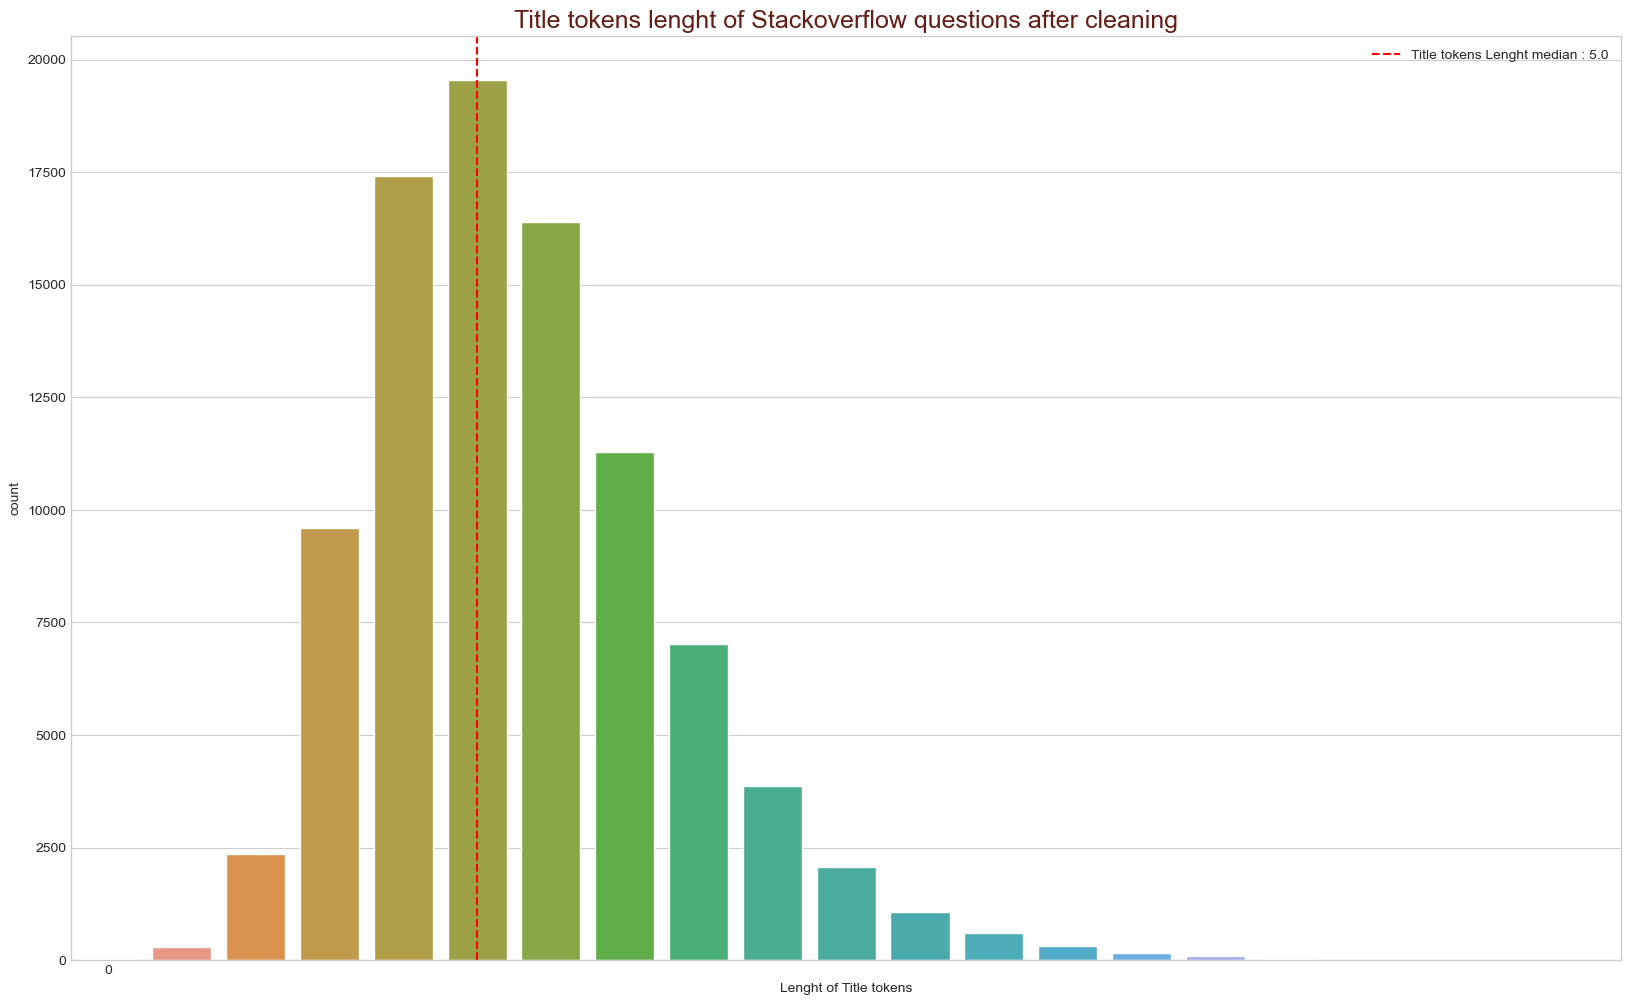

In [56]:
# Calculate lenght of each list in Title
data['title_tokens_count'] = [len(_) for _ in data.Title]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.title_tokens_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
plot_median = data.title_tokens_count.median()
plt.axvline(plot_median - data.title_tokens_count.min(),
            color="r", linestyle='--',
            label="Title tokens Lenght median : "+str(plot_median))
ax.set_xlabel("Lenght of Title tokens")
plt.title("Title tokens lenght of Stackoverflow questions after cleaning",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()



In [57]:
#Regardons les fréquences de chaque mots de la variable Title pour visualiser les plus représentés :

# Create a list of all tokens for Title
full_corpus = []
for i in data['Title']:
    full_corpus.extend(i)

In [58]:
# Calculate distribition of words in Title token list
title_dist = nltk.FreqDist(full_corpus)
title_dist = pd.DataFrame(title_dist.most_common(8000),
                         columns=['Word', 'Frequency'])
title_dist.describe()


,Frequency
count,8000.000000
mean,62.274750
std,223.409854
min,3.000000
25%,5.000000
50%,11.000000
75%,34.000000
max,5457.000000


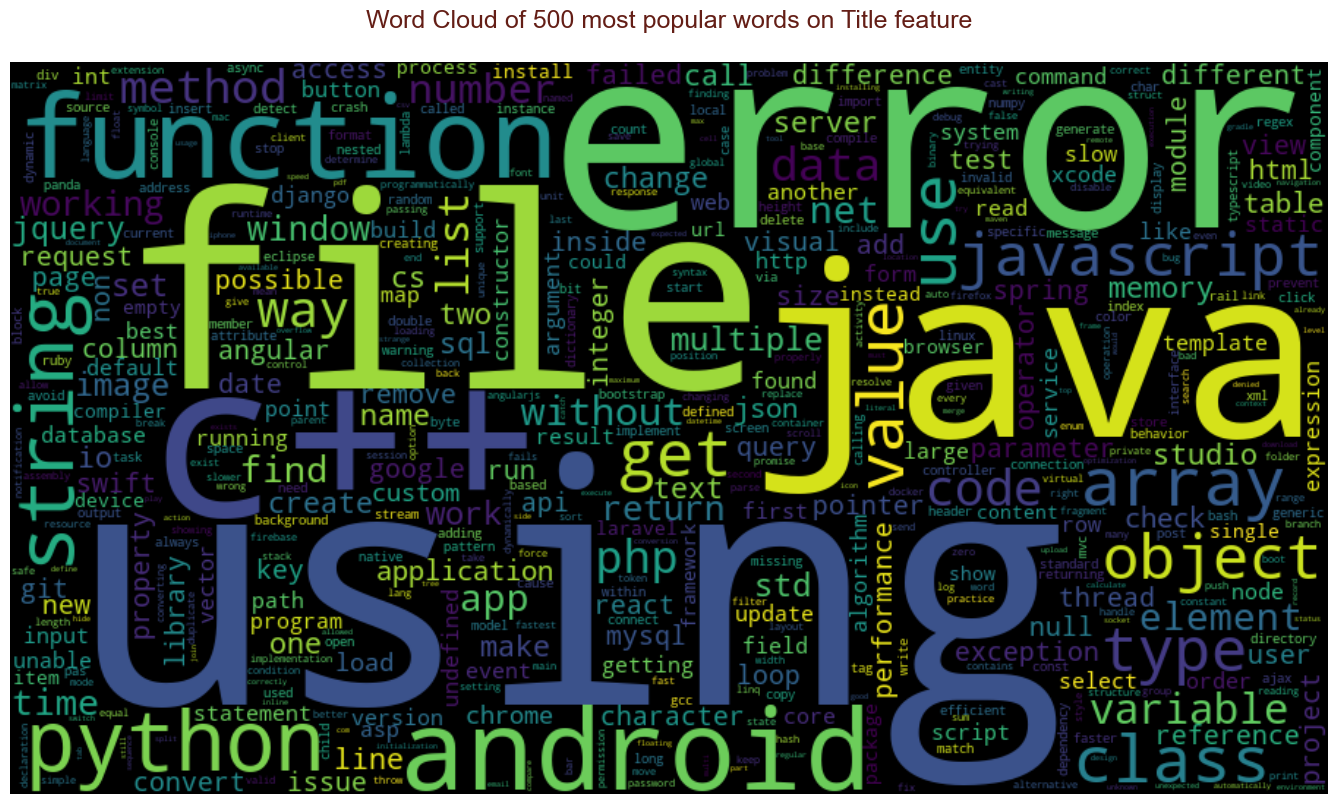

In [59]:
# Plot word cloud with tags_list (frequencies)
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(title_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 500 most popular words on Title feature\n",
          fontsize=18, color="#641E16")
plt.show()


In [62]:

# Remove calculated features
data = data[['Title',
             'Body',
             'Score',
             'Tags_list']]

In [63]:
# Rename columns
data = data.rename(columns={'Tags_list': 'Tags'})

data.head(5)


,Title,Body,Score,Tags
Id,,,,
4795928,"[check, element, exists]","[possible, duplicate, exists, function, jquery...",31,"[javascript, jquery]"
4796305,"[internet, explorer, send, http, post, body, a...","[able, reliably, recreate, following, scenario...",115,[javascript]
4797373,"[eval, point]","[official, documentation, regarding, function,...",6,[php]
4797418,"[tracking, object, allocation, python]","[method, override, allow, use, print, statemen...",10,[python]
4797444,"[weird, error, installing, android, app]","[intellij, idea, exported, signed, application...",7,[android]


In [64]:
data.shape

(92144, 4)

In [65]:
# Export to CSV
data.to_csv("StackOverflow_cleaned.csv", sep=";")